IRVAN ARDIANSYAH (1301204532) 

MOCH IBNI HASYIM I. (1301204015)

# Import library yang diperlukan

In [160]:
import pandas as pd
import io
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import butter, lfilter, freqz

# Import Data

In [161]:
df = pd.read_csv('/content/data_1629_accel_phone.csv',
                 header=None,
                 names=['subject-id', 'activity', 'timestamp', 'x', 'y', 'z'])


# Eliminasi data yang tidak diperlukan

In [162]:
#menghapus ";" pada data ke "Z"
df['z'] = df['z'].str.replace(';', '')
df['z'] = df['z'].astype(float)

# Menampilkan isi dataset

In [163]:
df

,subject-id,activity,timestamp,x,y,z
0,1629,A,1127073672720666,-9.507858,2.903564,-1.763428
1,1629,A,1127073723074670,-9.951340,1.859940,-2.411072
2,1629,A,1127073773428674,-10.131989,1.984741,-1.222198
3,1629,A,1127073823782678,-9.568985,1.659058,-2.209625
4,1629,A,1127073874136682,-10.134720,1.998611,-0.459167
...,...,...,...,...,...,...
96191,1629,H,605758900424989,-5.524948,3.567337,-8.036804
96192,1629,H,605758950778992,-5.490555,3.594757,-8.045151
96193,1629,H,605759001132996,-5.501541,3.652389,-8.028244
96194,1629,H,605759051487000,-5.514694,3.677475,-7.973343


#Mendeklarasikan dataset ke-kolom/variabel A,B,C 

In [164]:

B = df.iloc[:, 3] #sumbu X
C = df.iloc[:, 4] #sumbu Y
D = df.iloc[:, 5] #sumbu Z

#karena datanya banyak, kita hanya mengambil 500 data saja
X = B[1 : 1000]
Y = C[1 : 500]

Z = D[1 : 500]


# Analisis

In [165]:
#mengembalikan hasil nilai MVA dari dataset
def MVA_Filter(data,window_size):
  result = data.rolling(window=window_size).mean()
  return result
     

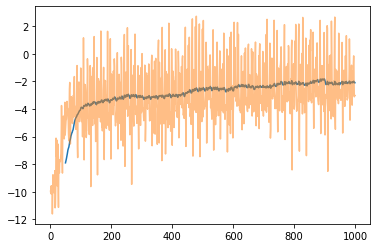

In [166]:
MVA_Filter(X,50).plot(label ='MVA')
plt.plot(X, label='B', alpha = 0.5)
MVA_B = MVA_Filter(X,50)


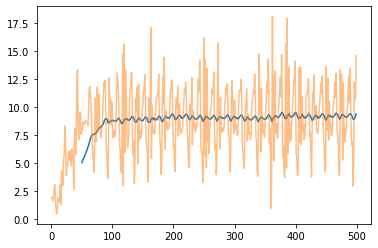

In [167]:
MVA_Filter(Y,50).plot(label ='MVA')
plt.plot(Y, label='C', alpha = 0.5)
MVA_C = MVA_Filter(Y,50)

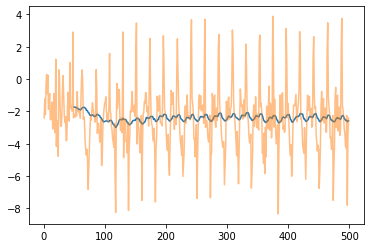

In [168]:

MVA_Filter(Z,50).plot(label ='MVA')
plt.plot(Z, label='D', alpha = 0.5)
MVA_D = Z.rolling(window=50).mean()

In [169]:

def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a


def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y

# Filter requirements.
order = 6
fs = 30.0   # sample rate, per data
cutoff = 3.667  # cutoff frequency yang diinginkan dari filter

# mengambil nilai koefisiensi filter.
b, a = butter_lowpass(cutoff, fs, order)

     

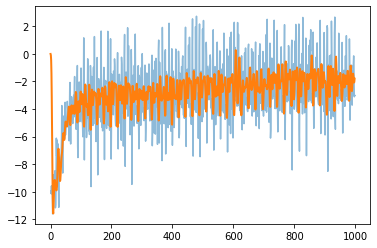

In [170]:
y = butter_lowpass_filter(X, cutoff, fs, order)
plt.plot(X, label='B', alpha = 0.5)
plt.plot(y, linewidth=2, label='filtered data')

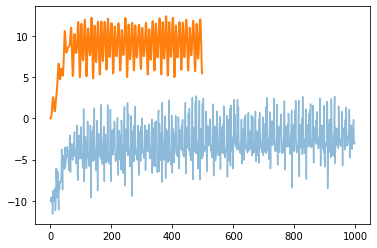

In [171]:
y = butter_lowpass_filter(Y, cutoff, fs, order)
plt.plot(X, label='C', alpha = 0.5)
plt.plot(y, linewidth=2, label='filtered data')

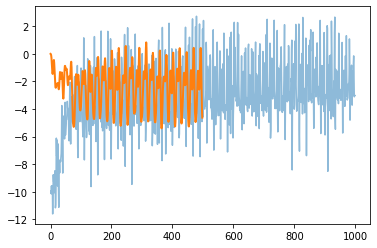

In [172]:
y = butter_lowpass_filter(Z, cutoff, fs, order)
plt.plot(X, label='D', alpha = 0.5)
plt.plot(y, linewidth=2, label='filtered data')
     